### Exercícios

Utilizando a plotagem com pandas, reproduzam as visualizações abaixo, tentando deixá-las o mais próximas quanto possível da maneira como estão postas. Para isso, atentem-se às personalizações dos gráficos, como títulos, legendas, eixos e outros tipos possíveis de formatações e preferências de visualizações dos dados. Também é interessante que vocês discutam possíveis pontos de melhorias dessas visualizações!

**Exercício 1.** Reproduza o gráfico de barras abaixo, em que cada barra representa um dos 10 países com mais casos confirmados de COVID no dataset, e a "quebra" em cada cor indica a predominância de casos confirmados em cada mês.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

**Ler o dataset.**

In [2]:
df_covid = pd.read_csv('Covid_19_Countrywise_timeseries.csv')
df_covid.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4973 entries, 0 to 4972
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4973 non-null   int64  
 1   ObservationDate  4973 non-null   object 
 2   country          4973 non-null   object 
 3   Confirmed        4973 non-null   int64  
 4   Deaths           4973 non-null   int64  
 5   Recovered        4973 non-null   int64  
 6   Code             4713 non-null   object 
 7   latitude         4728 non-null   float64
 8   longitude        4728 non-null   float64
 9   New Confirmed    4973 non-null   int64  
 10  New Recovered    4973 non-null   int64  
 11  New Death        4973 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 466.3+ KB


**Transformar a data (string) em datetime.**

In [4]:
df_covid['date'] = pd.to_datetime(df_covid['ObservationDate'])

In [5]:
df_covid[['ObservationDate', 'date']].head()

,ObservationDate,date
0,02/28/2020,2020-02-28
1,03/10/2020,2020-03-10
2,02/24/2020,2020-02-24
3,02/25/2020,2020-02-25
4,02/26/2020,2020-02-26


**Top 10 países com mais casos confirmados (acumulado)**

In [6]:
df_covid10 = df_covid.groupby("country")['New Confirmed'].sum().sort_values(ascending = False)[0:10].sort_index(ascending=True).reset_index()
df_covid10

,country,New Confirmed
0,china,81401
1,france,38105
2,germany,57695
3,iran,35408
4,italy,92472
5,netherlands,9819
6,spain,73235
7,switzerland,14076
8,uk,17312
9,us,121478


**Gráfico simples com o total de confirmados por pais (acumulado nos 3 meses)**

<AxesSubplot: >

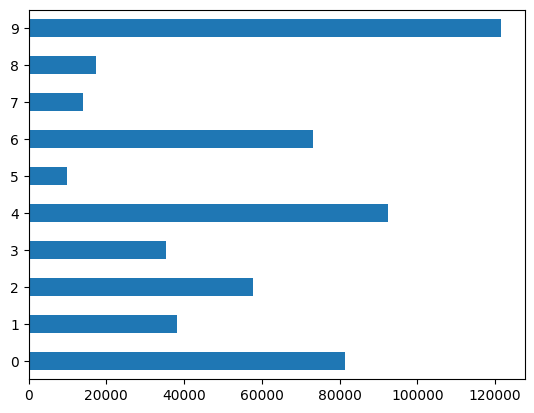

In [7]:
df_covid10.plot.barh(legend=False)

In [8]:
lista_country = df_covid10['country'].tolist()
lista_country

['china',
 'france',
 'germany',
 'iran',
 'italy',
 'netherlands',
 'spain',
 'switzerland',
 'uk',
 'us']

- **Filtrando JANEIRO.**

In [9]:
f1_1 = (df_covid['date'] >= ('2020-01-01'))
f1_2 = (df_covid['date'] <= ('2020-01-31'))

january = df_covid.loc[(f1_1 & f1_2), ['country', 'date', 'New Confirmed']]
df_january = pd.DataFrame(january)
df_january.head()


,country,date,New Confirmed
202,australia,2020-01-23,0
203,australia,2020-01-25,4
204,australia,2020-01-26,0
205,australia,2020-01-27,1
206,australia,2020-01-28,0


In [10]:
top10_january = df_january.loc[df_january['country'].isin(lista_country)]
top10_january.head()

,country,date,New Confirmed
880,china,2020-01-22,547
881,china,2020-01-23,92
882,china,2020-01-24,277
883,china,2020-01-25,483
884,china,2020-01-26,663


In [11]:
jan_cc = top10_january.groupby("country")['New Confirmed'].sum()
jan_cc

country
china      9783
france        5
germany       5
italy         2
uk            2
us            6
Name: New Confirmed, dtype: int64

- **Filtrando FEVEREIRO.**

In [12]:
f2_1 = (df_covid['date'] >= ('2020-02-01'))
f2_2 = (df_covid['date'] <= ('2020-02-29'))

df_february = df_covid.loc[(f2_1 & f2_2), ['country', 'date', 'New Confirmed']]
df_february.head()

,country,date,New Confirmed
0,azerbaijan,2020-02-28,0
2,afghanistan,2020-02-24,1
3,afghanistan,2020-02-25,0
4,afghanistan,2020-02-26,0
5,afghanistan,2020-02-27,0


In [13]:
top10_february = df_february.loc[df_february['country'].isin(lista_country)]
top10_february.head()

,country,date,New Confirmed
890,china,2020-02-01,2088
891,china,2020-02-02,4736
892,china,2020-02-03,3086
893,china,2020-02-04,3987
894,china,2020-02-05,3729


In [14]:
feb_cc = top10_february.groupby("country")['New Confirmed'].sum()
feb_cc

country
china          69468
france            95
germany           74
iran             593
italy           1126
netherlands        6
spain             45
switzerland       18
uk                21
us                64
Name: New Confirmed, dtype: int64

- **Filtrando MARÇO.**

In [15]:
f3_1 = (df_covid['date'] >= ('2020-03-01'))
f3_2 = (df_covid['date'] <= ('2020-03-31'))

df_march = df_covid.loc[(f3_1 & f3_2), ['country', 'date', 'New Confirmed']]
df_march.head()

,country,date,New Confirmed
1,"('st. martin',)",2020-03-10,2
8,afghanistan,2020-03-01,0
9,afghanistan,2020-03-02,0
10,afghanistan,2020-03-03,0
11,afghanistan,2020-03-04,0


In [16]:
top10_march = df_march.loc[df_march['country'].isin(lista_country)]
top10_march.head()

,country,date,New Confirmed
919,china,2020-03-01,575
920,china,2020-03-02,200
921,china,2020-03-03,125
922,china,2020-03-04,120
923,china,2020-03-05,151


In [17]:
mar_cc = top10_march.groupby("country")['New Confirmed'].sum()
mar_cc

country
china            2150
france          38005
germany         57616
iran            34815
italy           91344
netherlands      9813
spain           73190
switzerland     14058
uk              17289
us             121408
Name: New Confirmed, dtype: int64

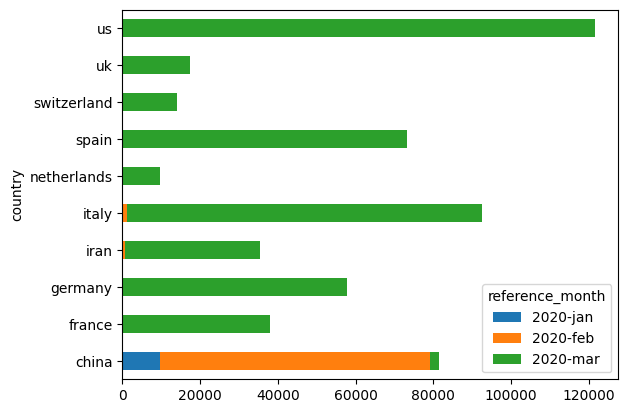

In [18]:

df_covid_final = pd.DataFrame({'2020-jan': jan_cc,
                               '2020-feb': feb_cc,
                               '2020-mar': mar_cc}, 
                              index=lista_country,)

ax = df_covid_final.plot.barh(ylabel='country', stacked=True)

plt.legend(title= 'reference_month')

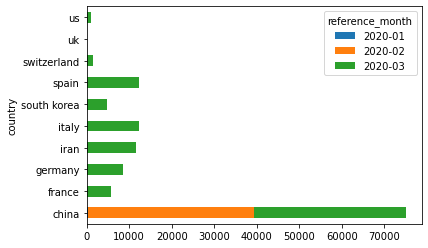

Para os exercícios abaixo, vamos trabalhar com um dataset de [emissão de CO2 por país, ao longo do tempo](https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country).

**Exercício 2.** Reproduza o gráfico de linhas abaixo, que representa a série temporal da evolução de emissões de CO2 no Brasil.

In [19]:
import pandas as pd

In [20]:
df_emissao = pd.read_csv('co2_emissions_kt_by_country.csv')
df_emissao.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


**Filtrar pais solicitado (Brasil)**

In [21]:
df_brazil = df_emissao[df_emissao['country_name'] == 'Brazil']
df_brazil.head()

,country_code,country_name,year,value
1522,BRA,Brazil,1960,46908.264
1523,BRA,Brazil,1961,49203.806
1524,BRA,Brazil,1962,53695.881
1525,BRA,Brazil,1963,55617.389
1526,BRA,Brazil,1964,56735.824


In [22]:
df_brazil.rename(columns={"value": "Brasil"}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4776\1139522917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil.rename(columns={"value": "Brasil"}, inplace=True)


<AxesSubplot: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

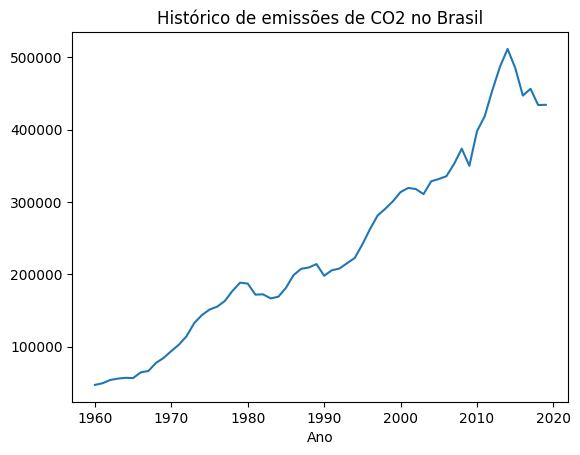

In [23]:
df_brazil.plot(x = 'year',
               y = 'Brasil',
               xlabel= 'Ano',
               title = 'Histórico de emissões de CO2 no Brasil',
               legend = False)

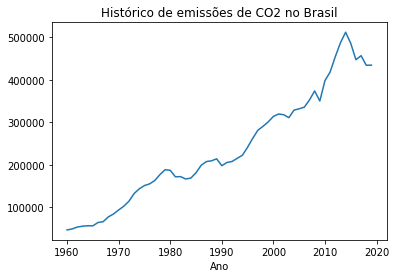

**Exercício 3**. Uma visualização muito similar à anterior, mas com a adição da média global de emissão de CO2 (o Brasil deve ser incluído na linha da média global?).

In [24]:
import pandas as pd

In [25]:
df_emissao.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


- Avaliar a Média Global

In [26]:
df_global = df_emissao.groupby("year")[['value']].mean().reset_index()
df_global.head()

,year,value
0,1960,379506.414474
1,1961,374035.311824
2,1962,381505.006340
3,1963,401537.009382
4,1964,411765.541760


- Transformando a coluna Value em lista para adicioná-la ao Data Frame e assim conseguir colocar a legenda da forma correta.

In [27]:
media_global = df_global['value'].tolist()


In [28]:
df_global['Média Global'] = media_global

<AxesSubplot: title={'center': 'Histórico de Emissões de CO2 Media Global x Brasil'}, xlabel='Ano'>

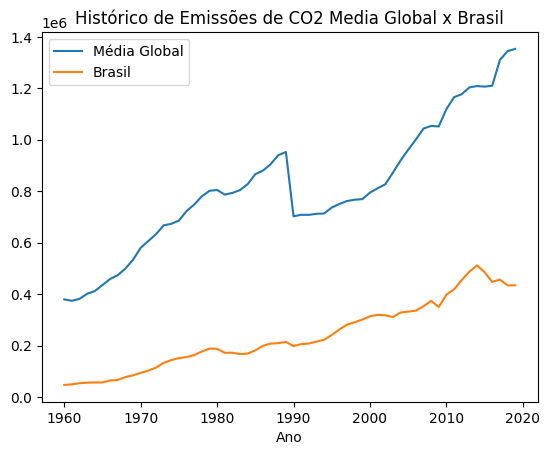

In [29]:
# Guardar o retorno do primeiro plot
ax = df_global.plot(kind = 'line', 
                    x = 'year', 
                    y = 'Média Global')

# Usar o retorno para especificar os eixos do segundo plot
df_brazil.plot(kind = 'line', 
               x = 'year', 
               y = 'Brasil', 
               ax = ax,
               xlabel='Ano',
               title='Histórico de Emissões de CO2 Media Global x Brasil')

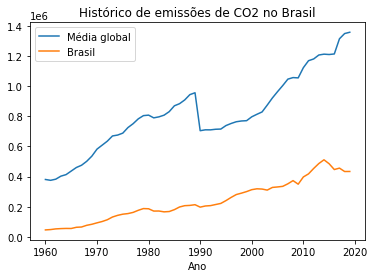

**Exercício 4.** Os 10 países que mais aumentaram, percentualmente, a emissão de CO2 entre os anos de 2018 e 2019, na forma de um gráfico de barras horizontal.

In [30]:
df_emissao.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [31]:
df_2018 = df_emissao[['country_name', 'year', 'value']][df_emissao['year'].isin([2018])].sort_values(by='value')
df_2018.columns = ['country_name', 'year', 'value2018']
df_2018

,country_name,year,value2018
12937,Tuvalu,2018,1.000000e+01
9472,Nauru,2018,6.000000e+01
6647,Kiribati,2018,9.000000e+01
11652,Sao Tome and Principe,2018,1.400000e+02
7397,Liechtenstein,2018,1.400000e+02
...,...,...,...
5508,IBRD only,2018,2.119031e+07
8253,Middle income,2018,2.131934e+07
7577,Low & middle income,2018,2.150789e+07
5568,IDA & IBRD total,2018,2.207611e+07


In [32]:
df_2019 = df_emissao[['country_name', 'year', 'value']][df_emissao['year'].isin([2019])].sort_values(by='value')
df_2019.columns = ['country_name', 'year', 'value2019']
df_2019

,country_name,year,value2019
12938,Tuvalu,2019,1.000000e+01
9473,Nauru,2019,6.000000e+01
6648,Kiribati,2019,9.000000e+01
7398,Liechtenstein,2019,1.500000e+02
11653,Sao Tome and Principe,2019,1.500000e+02
...,...,...,...
5509,IBRD only,2019,2.152242e+07
8254,Middle income,2019,2.171260e+07
7578,Low & middle income,2019,2.190943e+07
5569,IDA & IBRD total,2019,2.244242e+07


In [33]:
colunas = ['country_name','value2019']
df_join = df_2018.merge(df_2019[colunas], on='country_name', how='left')
df_join

,country_name,year,value2018,value2019
0,Tuvalu,2018,1.000000e+01,1.000000e+01
1,Nauru,2018,6.000000e+01,6.000000e+01
2,Kiribati,2018,9.000000e+01,9.000000e+01
3,Sao Tome and Principe,2018,1.400000e+02,1.500000e+02
4,Liechtenstein,2018,1.400000e+02,1.500000e+02
...,...,...,...,...
234,IBRD only,2018,2.119031e+07,2.152242e+07
235,Middle income,2018,2.131934e+07,2.171260e+07
236,Low & middle income,2018,2.150789e+07,2.190943e+07
237,IDA & IBRD total,2018,2.207611e+07,2.244242e+07


In [34]:
df_join['Percentual'] = round((((df_join['value2019'] / df_join['value2018']) - 1) * 100), 1)
df_join

,country_name,year,value2018,value2019,Percentual
0,Tuvalu,2018,1.000000e+01,1.000000e+01,0.0
1,Nauru,2018,6.000000e+01,6.000000e+01,0.0
2,Kiribati,2018,9.000000e+01,9.000000e+01,0.0
3,Sao Tome and Principe,2018,1.400000e+02,1.500000e+02,7.1
4,Liechtenstein,2018,1.400000e+02,1.500000e+02,7.1
...,...,...,...,...,...
234,IBRD only,2018,2.119031e+07,2.152242e+07,1.6
235,Middle income,2018,2.131934e+07,2.171260e+07,1.8
236,Low & middle income,2018,2.150789e+07,2.190943e+07,1.9
237,IDA & IBRD total,2018,2.207611e+07,2.244242e+07,1.7


In [35]:
df_join['PercentualGraf'] = df_join["Percentual"].astype(str) + " %"

In [36]:
df_top10 = df_join.sort_values(by='Percentual', ascending=True)[-10:]
df_top10

,country_name,year,value2018,value2019,Percentual,PercentualGraf
123,Myanmar,2018,32939.998627,36720.001221,11.5,11.5 %
68,"Congo, Rep.",2018,6489.999771,7260.000229,11.9,11.9 %
73,North Macedonia,2018,7300.000191,8300.000191,13.7,13.7 %
88,"Yemen, Rep.",2018,9720.000267,11100.000381,14.2,14.2 %
70,El Salvador,2018,6809.999943,7800.000191,14.5,14.5 %
177,Vietnam,2018,285600.006104,336489.990234,17.8,17.8 %
46,Suriname,2018,2210.000038,2650.000095,19.9,19.9 %
53,Madagascar,2018,3349.999905,4119.999886,23.0,23.0 %
103,Kenya,2018,17489.999771,22280.000687,27.4,27.4 %
90,Panama,2018,10060.000420,13340.000153,32.6,32.6 %


In [37]:
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 123 to 90
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    10 non-null     object 
 1   year            10 non-null     int64  
 2   value2018       10 non-null     float64
 3   value2019       10 non-null     float64
 4   Percentual      10 non-null     float64
 5   PercentualGraf  10 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [38]:
x = df_top10.country_name
y = df_top10.Percentual


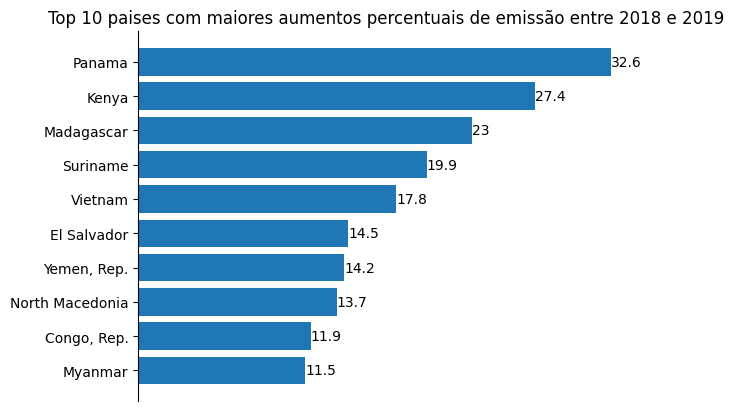

In [40]:
fig = plt.figure() # declara uma figura

graf = plt.barh(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(graf)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

ax[0].get_xaxis().set_visible(False)

plt.title('Top 10 paises com maiores aumentos percentuais de emissão entre 2018 e 2019')

plt.show()


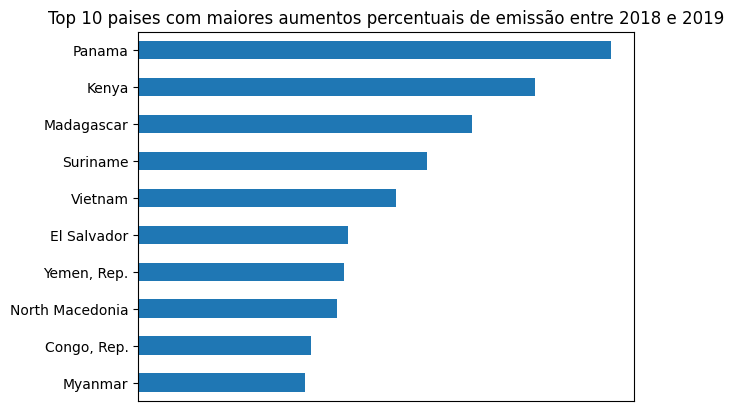

In [ ]:
# Utilizando apenas pandas.
ax = df_top10.plot.barh(x='country_name',
                        y='Percentual',
                        xlabel='',
                        legend=False,
                        xticks=[],
                        title='Top 10 paises com maiores aumentos percentuais de emissão entre 2018 e 2019',
                        )

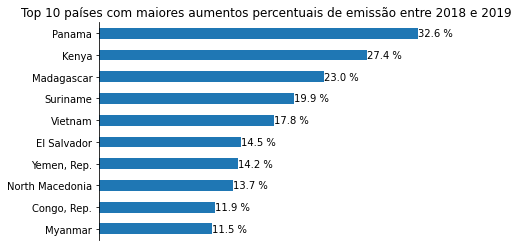